In [2]:
# first run this cell
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import plotly.express as px

from scripts.ionbot_utils import get_ionbot_condition, return_search_metrics, get_all_mods

# 4. ionbot

In this last part we bring together the three previous components (fragmentation intensity, retention time, and rescoring).
While MS²Rescore also leverages these predictions, ionbot incorporates these predictions while searching and applies some additional data-driven models[1].
One of the major features in ionbot is its ability to search simultaniously for all modifications present in unimod.



1. Degroeve, S., Gabriels, R., Velghe, K., Bouwmeester, R., Tichshenko, N., & Martens, L. (2021). ionbot: a novel, innovative and sensitive machine learning approach to LC-MS/MS peptide identification.

In [3]:
folder = "http://genesis.ugent.be/uvpublicdata/workshop-ml-proteomics/4-Ionbot/"
dataset = "PXD001250"

# 4.1 Identification analysis

First we will start by loading the different ionbot searches. First we have the open versus the closed searches and then we will also compare the open searches without retention time and/or without peak intensity predicitons.

In [4]:
# First we'll load the datasets for the open and closed modification search
ionbot = get_ionbot_condition("",folder,dataset)
ionbot_c = get_ionbot_condition("_closed",folder,dataset)

ionbot_nocorr = get_ionbot_condition("_nocorr",folder,dataset)
ionbot_nort = get_ionbot_condition("_nort",folder,dataset)
ionbot_nocorr_nort = get_ionbot_condition("_nocorr_nort",folder,dataset)


We will primarily look at the PSMs level but if you want to view the peptide or even protein level you can set the level yourself and then run the plots below

In [10]:
# Choose the level of identifications you want to plot
level = 0
level_dict = {
    0:"psms",
    1:"peptides",
    2:"proteins"
}

In [11]:
# Let's check the the number of psms for the open search versus the closed search
fig = px.bar(
    y=[return_search_metrics(ionbot)[level], return_search_metrics(ionbot_c)[level]], 
    x=[" open", "closed"],
    labels={
    "y": f"number of {level_dict[level]}",
    "x": "search condition",
    }
)
fig


By using the open search we find a lot more identification on the PSMs level, but if we leave out the retention time and peak intensity correlations we can see that the number of PSMs slightly drop especially when we'll leave out both.(see below)

In [12]:
# Now let's check it for all the conditions
fig = px.bar(
    y= [
        return_search_metrics(ionbot)[level],
        return_search_metrics(ionbot_c)[level],
        return_search_metrics(ionbot_nocorr)[level],
        return_search_metrics(ionbot_nort)[level],
        return_search_metrics(ionbot_nocorr_nort)[level],
    ],
    x=["open", "closed","no correlation", "no retention time", "no correlation & no retention time"],
    labels={
    "y": f"number of {level_dict[level]}",
    "x": "search condition",
    }
)
fig

# 4.2 Analysing modifications

In this tutorial we will keep the analysis of modifications very simple and short. We will look at the amount of modifications found across all PSMs.

In [8]:
all_mods_counter_obj = get_all_mods(ionbot)

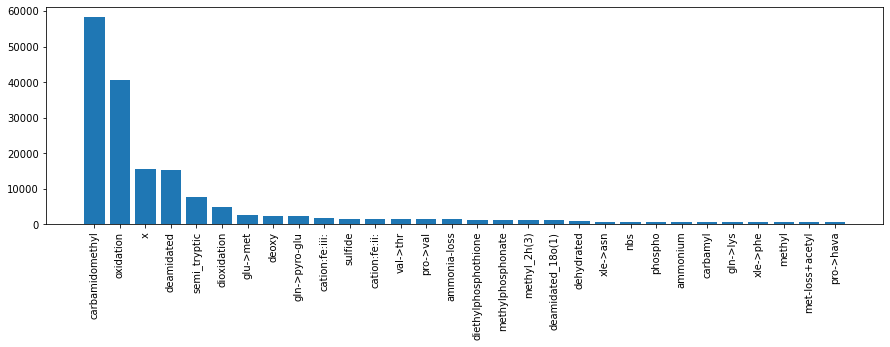

In [9]:
plt.figure(figsize=(15,4))
plt.bar([k for k,v in all_mods_counter_obj.most_common(30)],[v for k,v in all_mods_counter_obj.most_common(30)])
plt.xticks(rotation=90)
plt.show()

# 4.2.1 Questions - Analysing modifications

_question: What kind of modifications should be most frequently observed? Are there modifications you did not expect to see (this frequent?_
